# LIBRERIAS

In [1]:
import pandas as pd
import seaborn as sns   
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import time

# Cleaning Data

In [2]:
import_file= "/kaggle/input/importacion-de-prod-vegetales-agost-octperu-2024/IMPORT_PROD_VEG.xlsx"
import_data = pd.read_excel(import_file,header=0)

# Renombrar datos de filas ,para que sean mas cortas
import_data['Producto'] = import_data['Producto'].str.replace('Las demas partes de maquinas, aparatos y artefactos de cosecha o trillar, maquinarias para limpieza, usadas','PARTES MÁQUINAS COSECHA/TRILLAR USADAS')
import_data['Producto'] = import_data['Producto'].str.replace('Las demás maderas de coníferas, perfilada longitudi (con lengüetas ranuras, rebajes, acanalados, biselados, con juntas en v, redond  o simil) en una o varias caras, cantos o extrem, incluso cepillada, lijada o unida por los extrem, con algún proceso de la CRF 2','MADERAS CONÍFERAS PERFILADAS CRF2')

#renombrar texto del encabezado (por comodidad)
rename_names_dic = {
    'Peso.Tn.': 'Peso.Ton.',
}   
import_data = import_data.rename(columns=rename_names_dic)
import_data.head()  

#mostrar los datos que sean distintos de 0.00
import_data = import_data[import_data['Peso.Ton.'] != 0.00] 

print(import_data.isnull().sum())
import_data

Mes                0
Sede               0
Producto           0
Peso.Ton.          0
Tipo.de.Envase     0
Pais.Origen       10
dtype: int64


,Mes,Sede,Producto,Peso.Ton.,Tipo.de.Envase,Pais.Origen
0,Agosto,OFICINA PUESTO DE CONTROL AEREO - PROV. CONST...,"SANDIA, semilla",0.031414,SACHETS,EEUU
1,Agosto,OFICINA PUESTO DE CONTROL AEREO - PROV. CONST...,"SANDIA, semilla",0.026572,SACHETS,EEUU
2,Agosto,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",86.480000,GRANEL,BOLIVIA
3,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"DACTYLIS, semilla",5.987000,SACO(S),EEUU
4,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"FESTULOLIUM, semilla",5.987000,SACO(S),EEUU
...,...,...,...,...,...,...
8305,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"FLOR DE JAMAICA, seca natural",12.000000,SACO(S),NIGERIA
8306,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"FLOR DE JAMAICA, seca natural",23.724000,SACO(S),NIGERIA
8307,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"FLOR DE JAMAICA, seca natural",108.000000,SACO(S),NIGERIA
8308,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"MARCOS, madera",0.219086,UNIDADES,CHINA


In [3]:
import_data = import_data.dropna()
print(import_data.isnull().sum())
print(import_data[import_data['Peso.Ton.'] == 0.00])

Mes               0
Sede              0
Producto          0
Peso.Ton.         0
Tipo.de.Envase    0
Pais.Origen       0
dtype: int64
Empty DataFrame
Columns: [Mes, Sede, Producto, Peso.Ton., Tipo.de.Envase, Pais.Origen]
Index: []


# ¿Que paises tienen la mayor cantidad de importaciones hacia nuestro pais?

Durante el periodo de Agosto a Octubre del 2024, realizando un grafico de pareto ,los paises de quienes hicimos la mayor cantidad de importaciones fueron: 
1. Bolivia
2. Chile
3. EE.UU.
4. Argentina
5. Ecuador
6. China
7. Brazil
8. Holanda
9. India

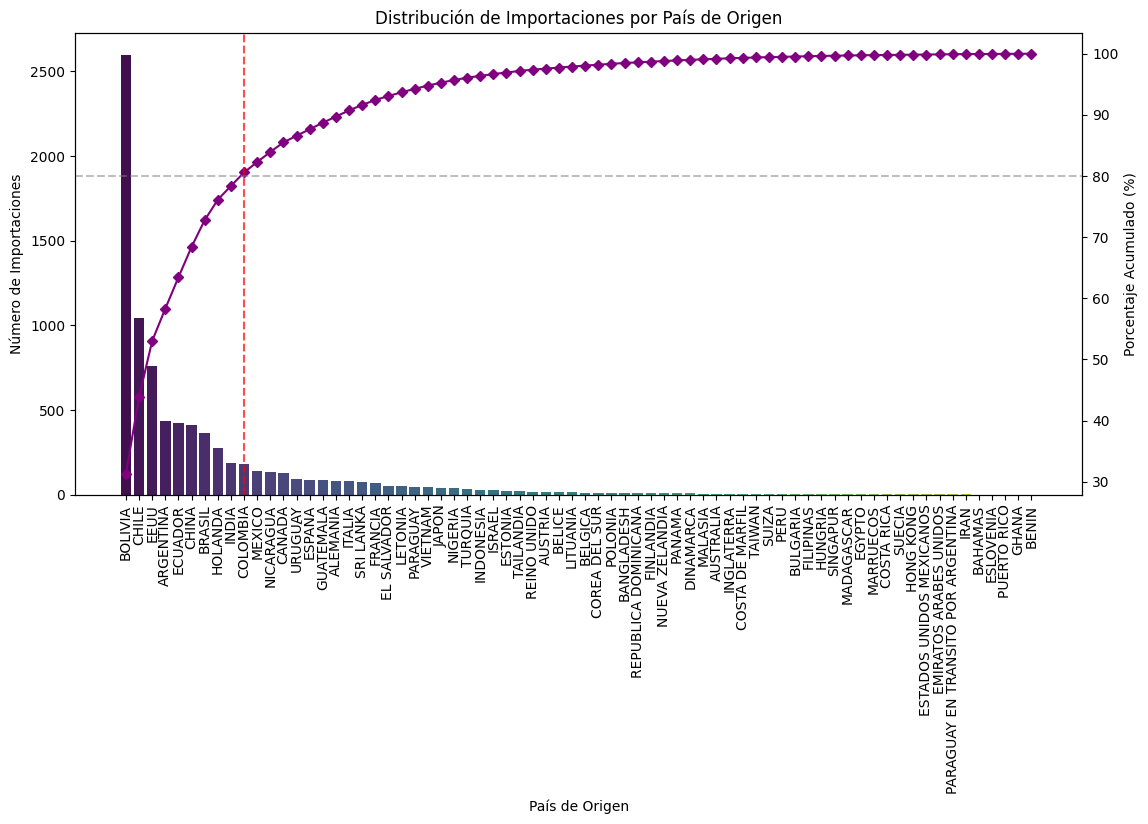

In [4]:
# Conteo de importaciones por país
country_counts = import_data['Pais.Origen'].value_counts()

# Gráfico de Pareto
fig, ax = plt.subplots(figsize=(13, 6))

# Gráfico de barras
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis", ax=ax)
ax.set_title("Distribución de Importaciones por País de Origen")
ax.set_xlabel("País de Origen")
ax.set_ylabel("Número de Importaciones")

# Rotación de etiquetas en el eje X
plt.xticks(rotation=90, ha='center')  # Cambia `ha` a 'center' para centrar las etiquetas verticales

# Gráfico de línea para porcentaje acumulado
ax2 = ax.twinx()
accum_percentage = country_counts.cumsum() / country_counts.sum() * 100
ax2.plot(country_counts.index, accum_percentage, color="purple", marker="D", markersize=5, linestyle="-")
ax2.axhline(80, color="gray", linestyle="--", alpha=0.5)
ax2.set_ylabel("Porcentaje Acumulado (%)")

# Determinar el índice donde el porcentaje acumulado cruza el 80%
cross_index = accum_percentage[accum_percentage >= 80].index[0]

# Dibujar una línea vertical en el punto donde cruza el 80%
ax2.axvline(x=cross_index, color="red", linestyle="--", alpha=0.7, label="Corte 80%")

plt.show()

# ¿Que paises tuvieron mayor cantidad de toneladas importadas?

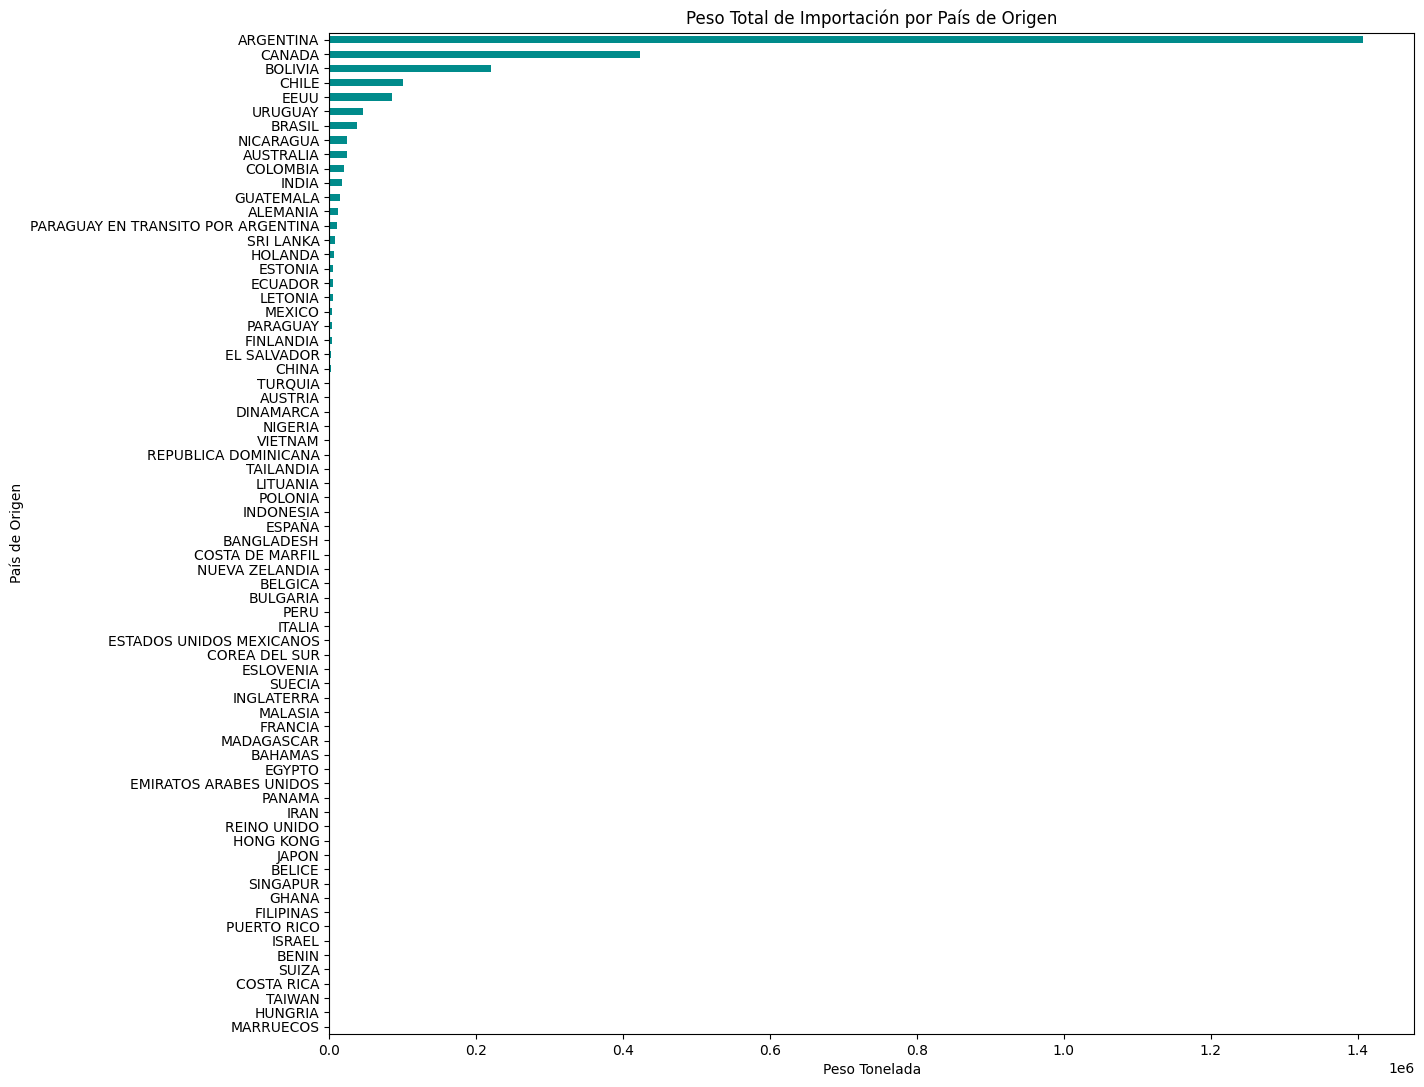

In [5]:
peso_total_pais = import_data.groupby('Pais.Origen')["Peso.Ton."].sum().sort_values()
peso_total_pais

peso_total_pais.plot(kind="barh", color="darkcyan", figsize=(14, 13))
plt.title("Peso Total de Importación por País de Origen")
plt.xlabel("Peso Tonelada")
plt.ylabel("País de Origen")
plt.show()

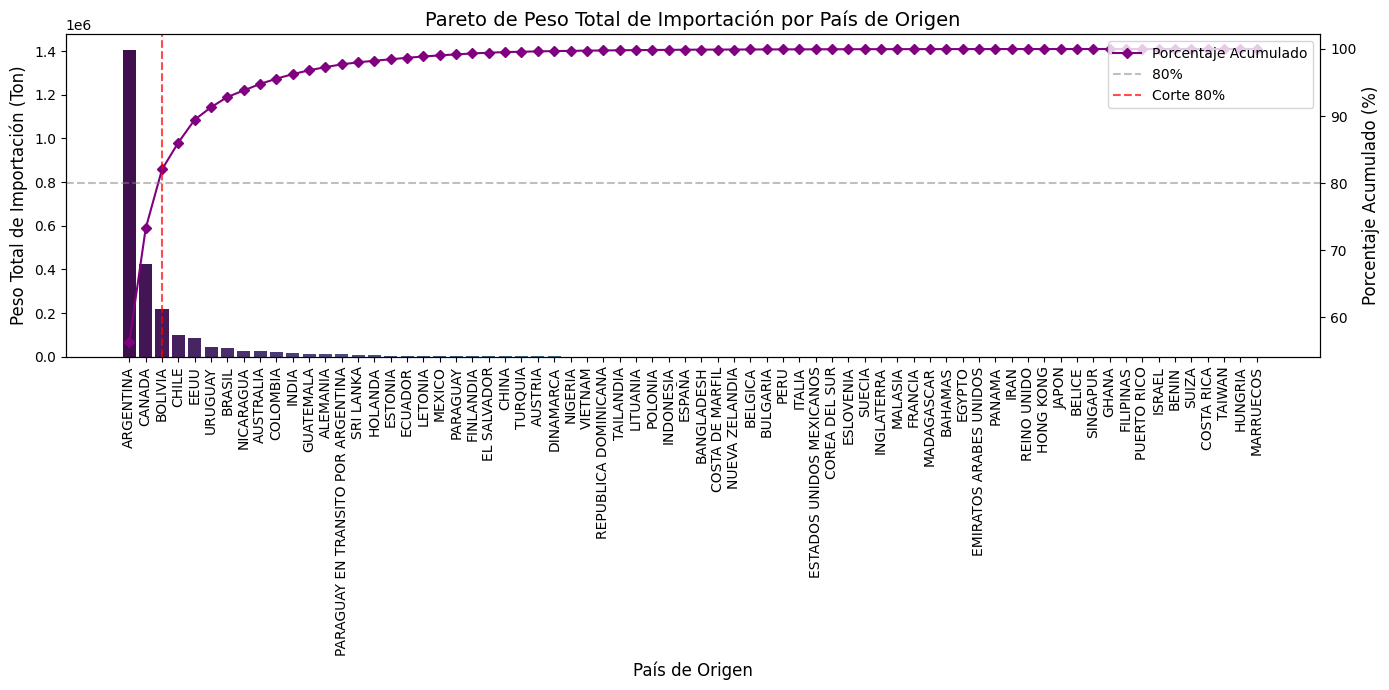

In [6]:
# Sumar el peso total por país y ordenarlo en orden descendente
peso_total_pais = import_data.groupby('Pais.Origen')["Peso.Ton."].sum().sort_values(ascending=False)

# Calcular el porcentaje acumulado
acumulado = peso_total_pais.cumsum() / peso_total_pais.sum() * 100

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 7))

# Gráfico de barras para el peso total por país
sns.barplot(
    x=peso_total_pais.index,
    y=peso_total_pais.values,
    palette="viridis",
    ax=ax
)
ax.set_title("Pareto de Peso Total de Importación por País de Origen", fontsize=14)
ax.set_xlabel("País de Origen", fontsize=12)
ax.set_ylabel("Peso Total de Importación (Ton)", fontsize=12)

# Rotación de etiquetas en el eje X
plt.xticks(rotation=90, ha="center")

# Crear el eje secundario para el porcentaje acumulado
ax2 = ax.twinx()
ax2.plot(
    peso_total_pais.index,
    acumulado,
    color="purple",
    marker="D",
    markersize=5,
    linestyle="-",
    label="Porcentaje Acumulado"
)
ax2.axhline(80, color="gray", linestyle="--", alpha=0.5, label="80%")
ax2.set_ylabel("Porcentaje Acumulado (%)", fontsize=12)

# Determinar el índice donde el porcentaje acumulado cruza el 80%
cross_index = acumulado[acumulado >= 80].index[0]

# Dibujar una línea vertical en el punto donde cruza el 80%
ax2.axvline(x=peso_total_pais.index.get_loc(cross_index), color="red", linestyle="--", alpha=0.7, label="Corte 80%")

# Mostrar leyendas
ax2.legend(loc="upper right", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# ¿Cuales son los produtos mas importados segun su Peso Total?

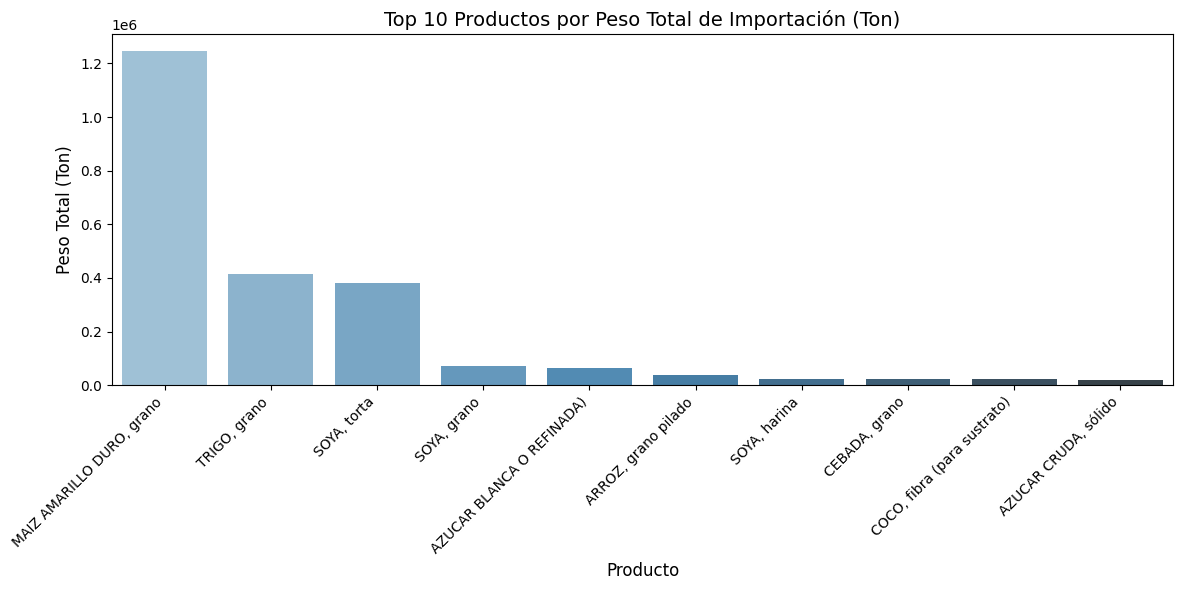

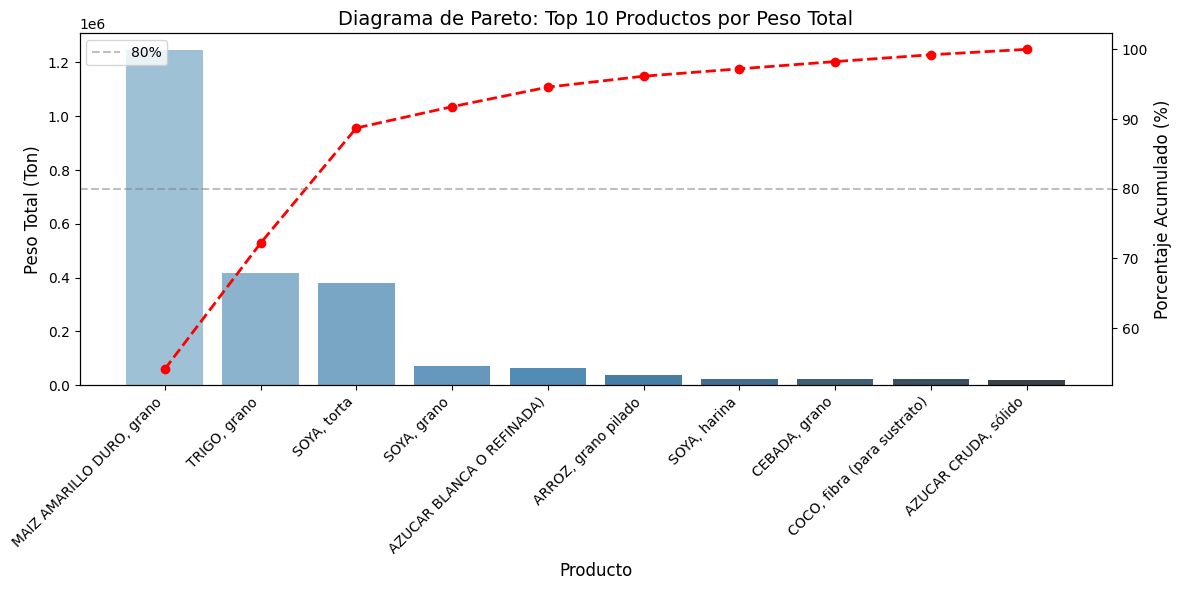

In [7]:
# Top 10 productos según el peso total (en toneladas)
top_productos = import_data.groupby("Producto")["Peso.Ton."].sum().sort_values(ascending=False).head(10)

# Gráfico de barras para el Top 10
plt.figure(figsize=(12, 6))
plt.title("Top 10 Productos por Peso Total de Importación (Ton)", fontsize=14)

sns.barplot(
    x=top_productos.index,
    y=top_productos.values,
    palette="Blues_d"
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Peso Total (Ton)", fontsize=12)
plt.xlabel("Producto", fontsize=12)
plt.tight_layout()

# Gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para los pesos
sns.barplot(
    x=top_productos.index,
    y=top_productos.values,
    palette="Blues_d",
    ax=ax1
)
ax1.set_title("Diagrama de Pareto: Top 10 Productos por Peso Total", fontsize=14)
ax1.set_ylabel("Peso Total (Ton)", fontsize=12)
ax1.set_xlabel("Producto", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Porcentaje acumulado
accum_percentage = top_productos.cumsum() / top_productos.sum() * 100

# Gráfico de línea para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(top_productos.index, accum_percentage, color="red", marker="o", linestyle="--", linewidth=2)
ax2.axhline(80, color="gray", linestyle="--", alpha=0.5, label="80%")
ax2.set_ylabel("Porcentaje Acumulado (%)", fontsize=12)
ax2.legend(loc="upper left")

# Ajustar diseño
plt.tight_layout()
plt.show()


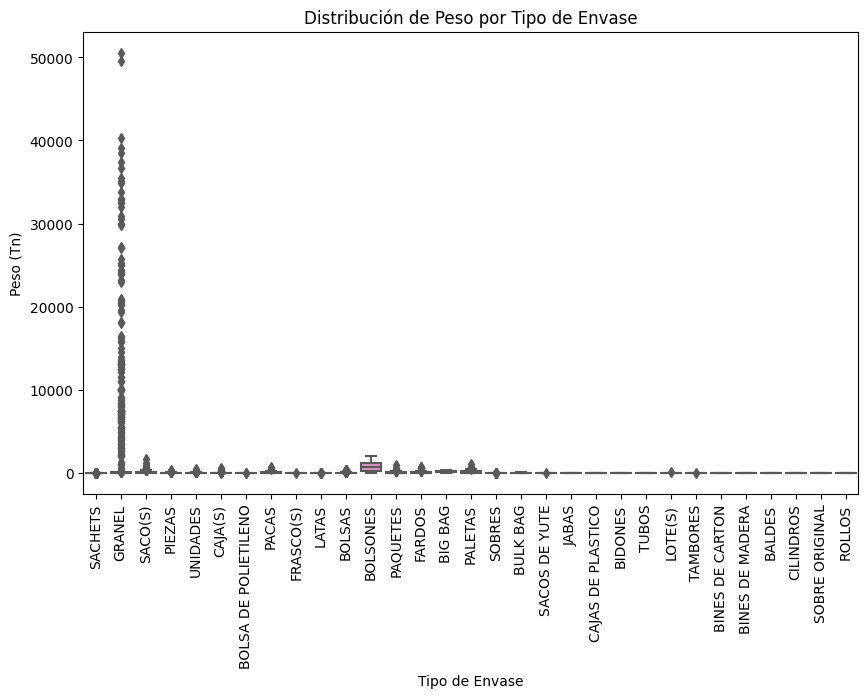

In [8]:
#Distribución de Peso Importado por Tipo de Envase
plt.figure(figsize=(10, 6))
sns.boxplot(x="Tipo.de.Envase", y="Peso.Ton.", data=import_data, palette="Set2")
plt.title("Distribución de Peso por Tipo de Envase")
plt.xlabel("Tipo de Envase")
plt.ylabel("Peso (Tn)")
plt.xticks(rotation=90)
plt.show()

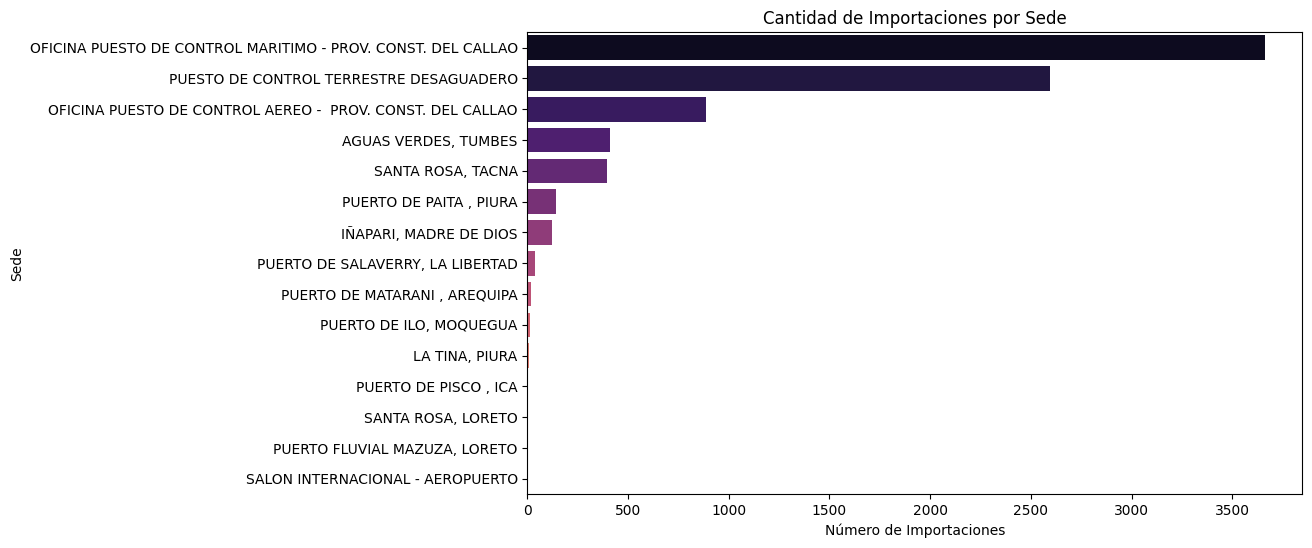

In [9]:
# Conteo de importaciones por sede
sede_counts = import_data['Sede'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sede_counts.values, y=sede_counts.index, palette="magma")
plt.title("Cantidad de Importaciones por Sede")
plt.xlabel("Número de Importaciones")
plt.ylabel("Sede")
plt.show()

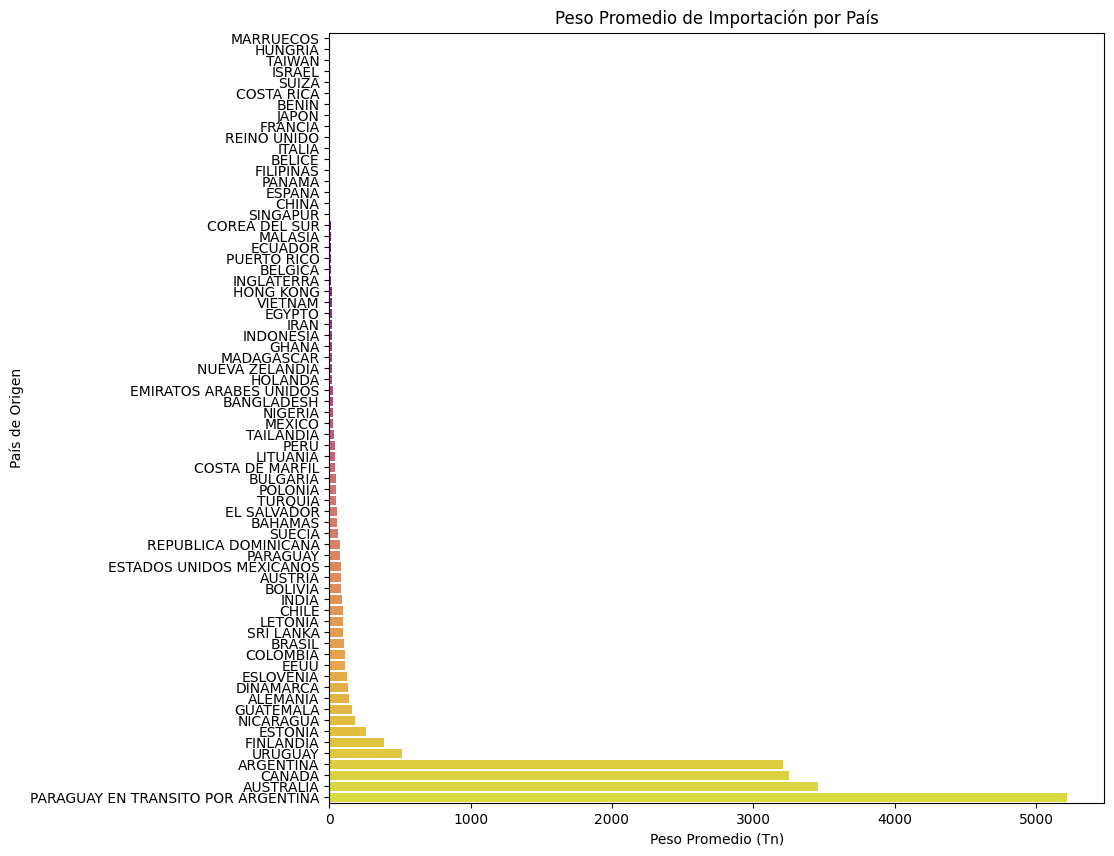

In [10]:
# Calcular el peso promedio por país de origen
country_avg_weight = import_data.groupby("Pais.Origen")["Peso.Ton."].mean().sort_values()

plt.figure(figsize=(10, 10))
sns.barplot(x=country_avg_weight.values, y=country_avg_weight.index, palette="plasma")
plt.title("Peso Promedio de Importación por País")
plt.xlabel("Peso Promedio (Tn)")
plt.ylabel("País de Origen")
plt.show()


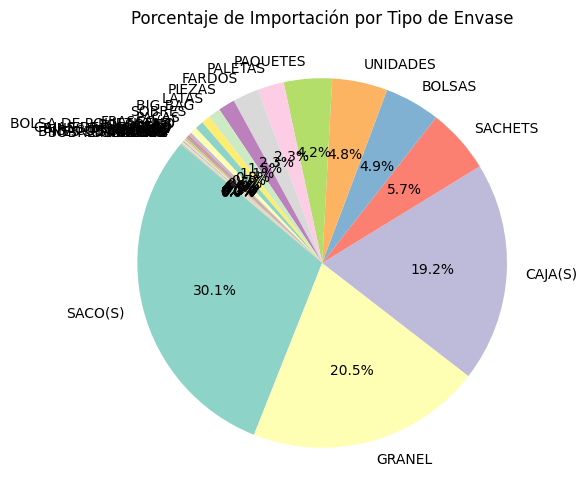

In [11]:
# Porcentaje de importación por tipo de envase
envase_counts = import_data["Tipo.de.Envase"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(envase_counts, labels=envase_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set3"))
plt.title("Porcentaje de Importación por Tipo de Envase")
plt.show()

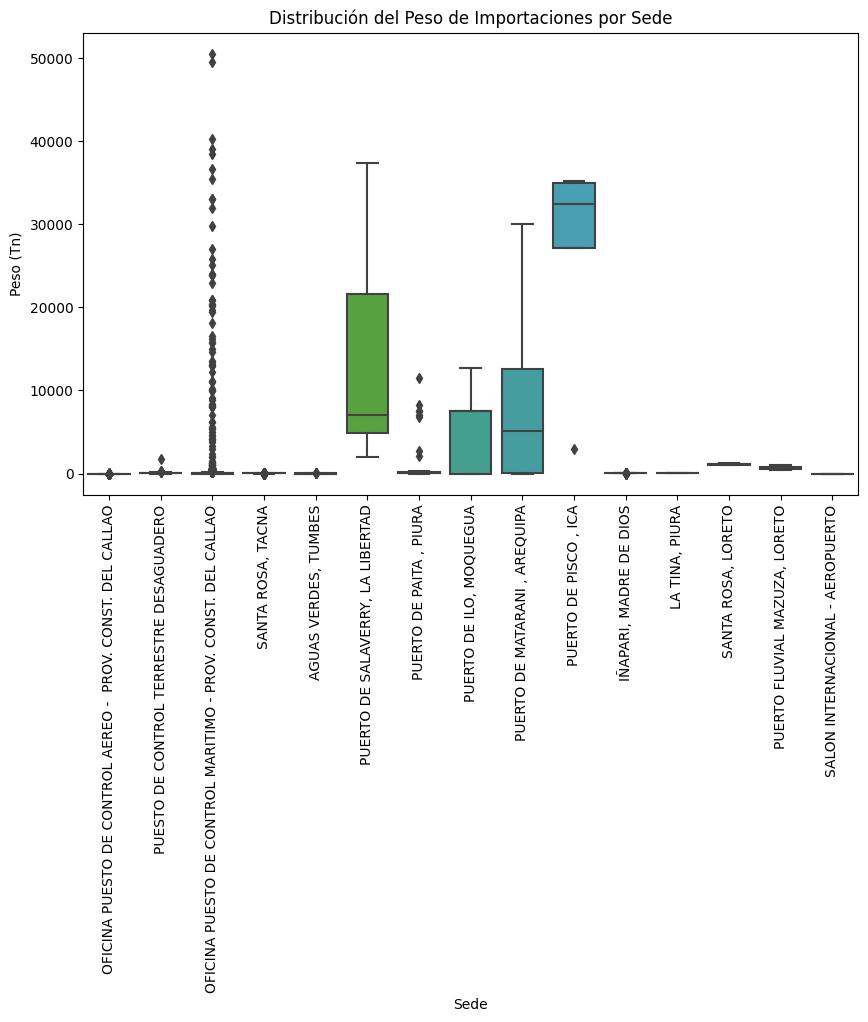

In [12]:
#Distribución del Peso de Importaciones por Sede
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sede", y="Peso.Ton.", data=import_data, palette="husl")
plt.title("Distribución del Peso de Importaciones por Sede")
plt.xlabel("Sede")
plt.ylabel("Peso (Tn)")
plt.xticks(rotation=90)
plt.show()


# BOLIVIA

,Mes,Sede,Producto,Peso.Ton.,Tipo.de.Envase,Pais.Origen
2,Agosto,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",86.48,GRANEL,BOLIVIA
11,Agosto,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"MAIZ AMARILLO DURO, grano",29.00,SACO(S),BOLIVIA
12,Agosto,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"MAIZ AMARILLO DURO, grano",29.00,SACO(S),BOLIVIA
52,Agosto,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",174.00,SACO(S),BOLIVIA
53,Agosto,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",145.00,SACO(S),BOLIVIA
...,...,...,...,...,...,...
8266,Octubre,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",28.00,GRANEL,BOLIVIA
8267,Octubre,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",84.00,GRANEL,BOLIVIA
8268,Octubre,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",84.00,GRANEL,BOLIVIA
8269,Octubre,PUESTO DE CONTROL TERRESTRE DESAGUADERO,"SOYA, torta",56.00,GRANEL,BOLIVIA


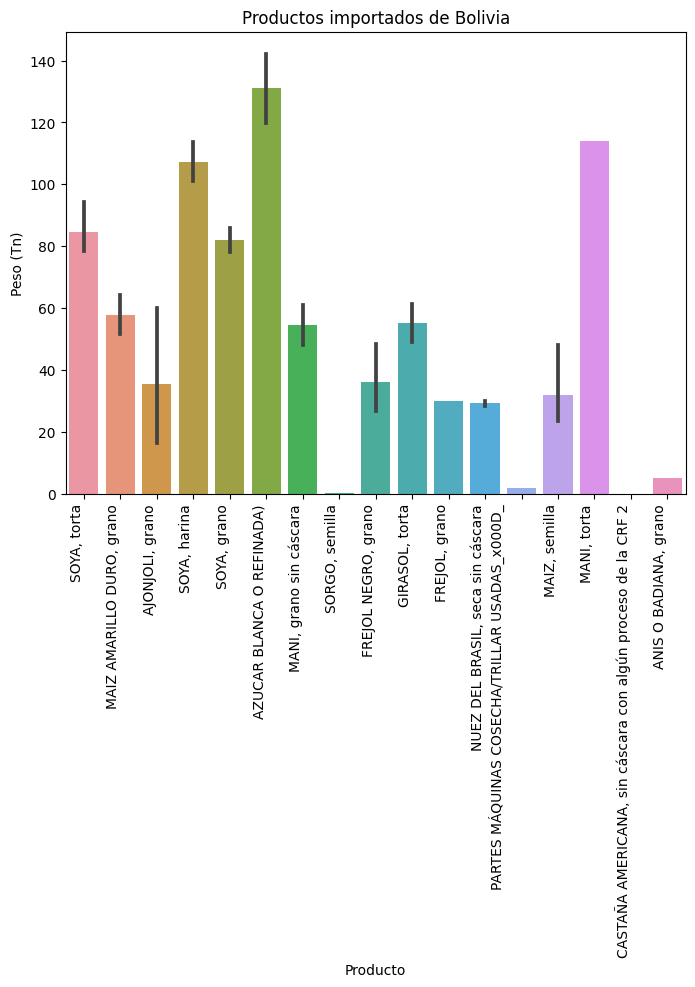

In [13]:
#PRODUCTOS IMPORTADOS DESDE BOLIVIA
bolivia_data = import_data[import_data["Pais.Origen"] == "BOLIVIA"]

plt.figure(figsize=(8,6))
plt.title("Productos importados de Bolivia")

sns.barplot(x=bolivia_data['Producto'], y=bolivia_data['Peso.Ton.'])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Peso (Tn)")
bolivia_data

# CHILE


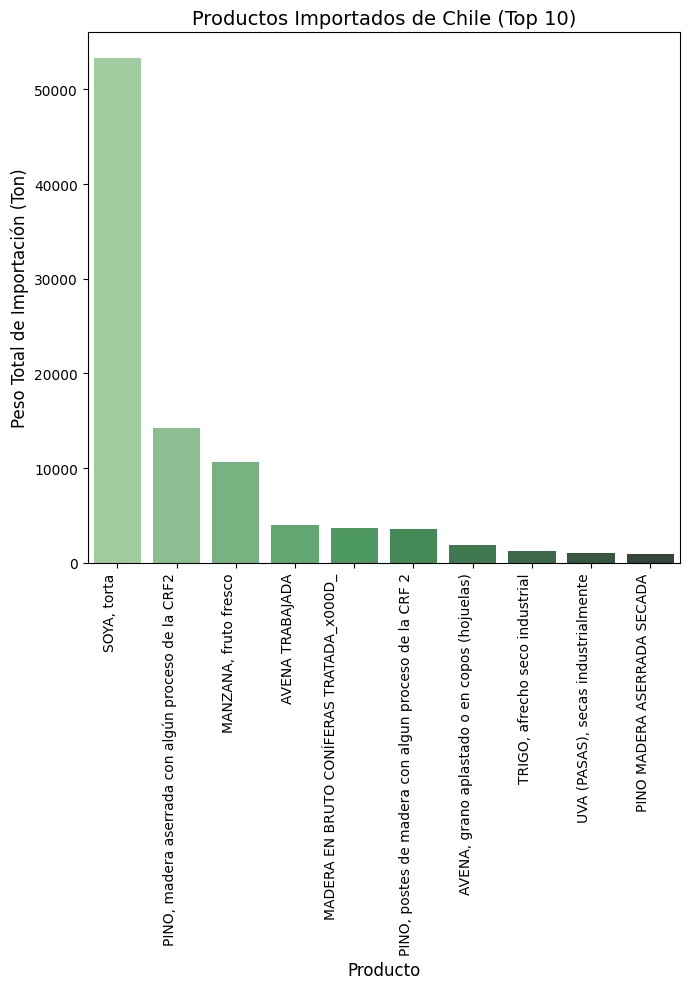

In [14]:
#PRODUCTOS IMPORTADOS DESDE CHILE

# Filtrar los datos de importaciones desde Chile
chile_data = import_data[import_data["Pais.Origen"] == "CHILE"]

# Agrupar por producto y sumar el peso total
top_productos_chile = chile_data.groupby("Producto")["Peso.Ton."].sum().sort_values(ascending=False).head(10)

# Crear el gráfico de barras con los 10 principales productos
plt.figure(figsize=(7, 10))
plt.title("Productos Importados de Chile (Top 10)", fontsize=14)

sns.barplot(
    x=top_productos_chile.index,
    y=top_productos_chile.values,
    palette="Greens_d"
)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.ylabel("Peso Total de Importación (Ton)", fontsize=12)
plt.xlabel("Producto", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# EE.UU.

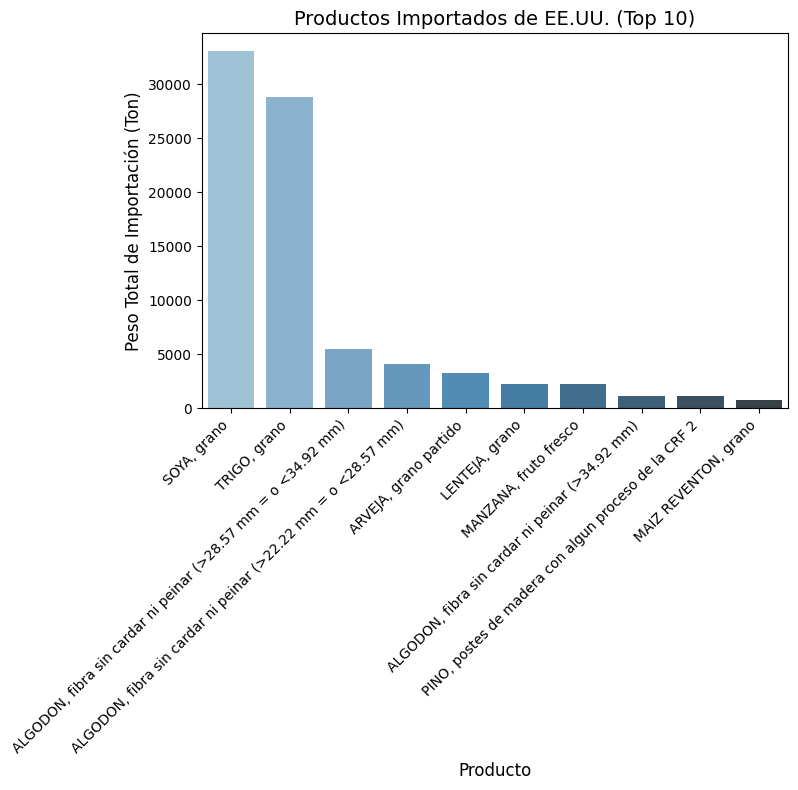

In [15]:
#PRODUCTOS IMPORTADOS DE EE.UU

# Filtrar los datos de importaciones desde EE.UU.
EEUU_data = import_data[import_data["Pais.Origen"] == "EEUU"]

# Agrupar por producto y sumar el peso total
top_productos = EEUU_data.groupby("Producto")["Peso.Ton."].sum().sort_values(ascending=False).head(10)

# Crear el gráfico de barras con los 10 principales productos
plt.figure(figsize=(8, 8))
plt.title("Productos Importados de EE.UU. (Top 10)", fontsize=14)

sns.barplot(
    x=top_productos.index,
    y=top_productos.values,
    palette="Blues_d"
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Peso Total de Importación (Ton)", fontsize=12)
plt.xlabel("Producto", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# ARGENTINA

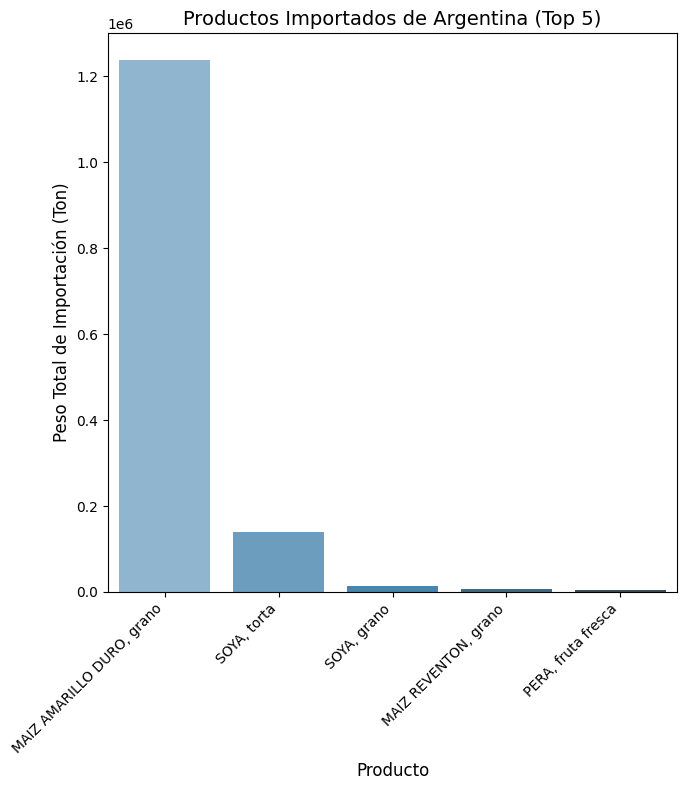

In [16]:
#PRODUCTOS IMPORTADOS DESDE ARGENTINA
argentina_data = import_data[import_data["Pais.Origen"] == "ARGENTINA"]

# Agrupar por producto y sumar el peso total
top_productos = argentina_data.groupby("Producto")["Peso.Ton."].sum().sort_values(ascending=False).head(5)

# Crear el gráfico de barras con los 10 principales productos
plt.figure(figsize=(7, 8))
plt.title("Productos Importados de Argentina (Top 5)", fontsize=14)

sns.barplot(
    x=top_productos.index,
    y=top_productos.values,
    palette="Blues_d"
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Peso Total de Importación (Ton)", fontsize=12)
plt.xlabel("Producto", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# ECUADOR

,Mes,Sede,Producto,Peso.Ton.,Tipo.de.Envase,Pais.Origen
8,Agosto,"AGUAS VERDES, TUMBES","CAÑA DE GUAYAQUIL, seca al natural",30.000,UNIDADES,ECUADOR
65,Agosto,"AGUAS VERDES, TUMBES","CAÑA DE GUAYAQUIL, seca al natural",32.000,UNIDADES,ECUADOR
96,Agosto,"AGUAS VERDES, TUMBES","PITAHAYA, fruto fresco",13.000,CAJA(S),ECUADOR
97,Agosto,"AGUAS VERDES, TUMBES","PITAHAYA, fruto fresco",13.000,CAJA(S),ECUADOR
111,Agosto,"AGUAS VERDES, TUMBES","PITAHAYA, fruto fresco",13.400,CAJA(S),ECUADOR
...,...,...,...,...,...,...
8160,Octubre,"AGUAS VERDES, TUMBES","ROSA, flores frescas cortadas",3.354,CAJA(S),ECUADOR
8161,Octubre,"AGUAS VERDES, TUMBES","CRISANTEMO, los demas flores frescas cortadas",0.600,CAJA(S),ECUADOR
8162,Octubre,"AGUAS VERDES, TUMBES","LILIUM (=AZUCENA), flores frescas cortadas",0.050,CAJA(S),ECUADOR
8169,Octubre,"AGUAS VERDES, TUMBES","CAÑA DE GUAYAQUIL, seca al natural",32.000,UNIDADES,ECUADOR


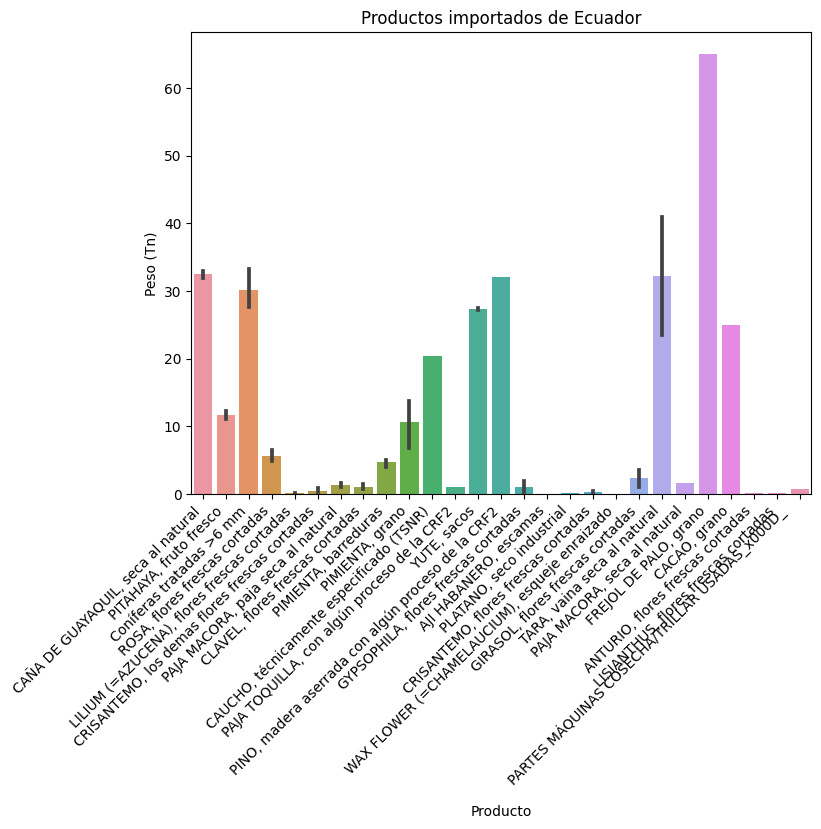

In [17]:
#PRODUCTOS IMPORTADOS DESDE ECUADOR
ecuador_data = import_data[import_data["Pais.Origen"] == "ECUADOR"]

plt.figure(figsize=(8,6))
plt.title("Productos importados de Ecuador")

sns.barplot(x=ecuador_data['Producto'], y=ecuador_data['Peso.Ton.'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Peso (Tn)")
ecuador_data

# INDIA

,Mes,Sede,Producto,Peso.Ton.,Tipo.de.Envase,Pais.Origen
67,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"COMINO, grano",27.0000,SACO(S),INDIA
108,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"COCO, fibra (para sustrato)",343.8750,PALETAS,INDIA
109,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"COCO, fibra (para sustrato)",236.2500,PALETAS,INDIA
110,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"COCO, fibra (para sustrato)",221.7600,PALETAS,INDIA
165,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"YUTE, sacos",16.6500,FARDOS,INDIA
...,...,...,...,...,...,...
8070,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"COCO, fibra (para sustrato)",116.2100,PALETAS,INDIA
8089,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"COCO, fibra (para sustrato)",110.0000,PALETAS,INDIA
8144,Octubre,OFICINA PUESTO DE CONTROL AEREO - PROV. CONST...,"COLIFLOR, semilla",0.0041,SACHETS,INDIA
8151,Octubre,"SANTA ROSA, TACNA","COMINO, grano",28.0000,SACO(S),INDIA


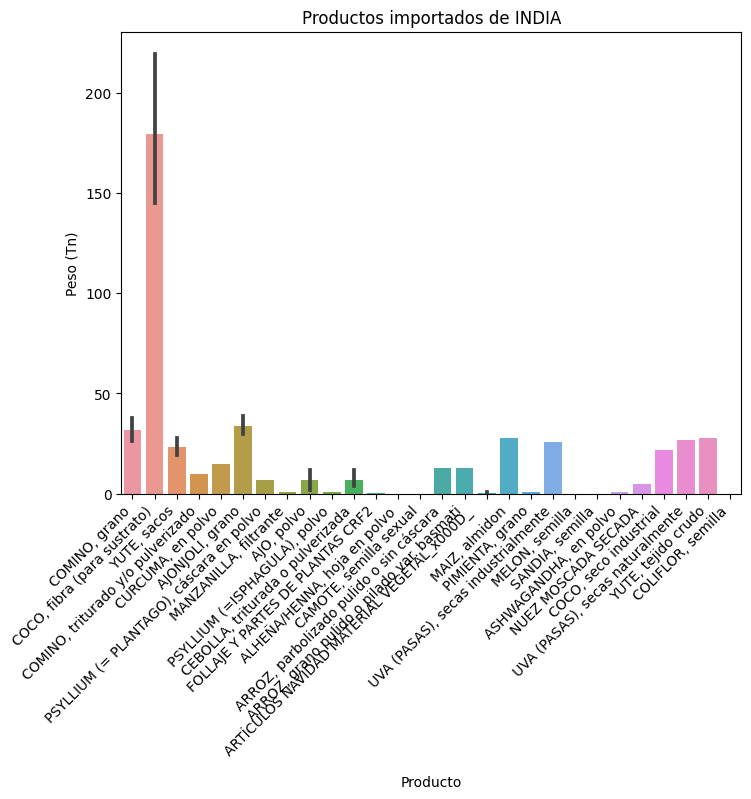

In [18]:
#PRODUCTOS IMPORTADOS DE INDIA
india_data = import_data[import_data["Pais.Origen"] == "INDIA"]

plt.figure(figsize=(8,6))
plt.title("Productos importados de INDIA")

sns.barplot(x=india_data['Producto'], y=india_data['Peso.Ton.'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Peso (Tn)")
india_data

# CANADA

,Mes,Sede,Producto,Peso.Ton.,Tipo.de.Envase,Pais.Origen
162,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"TRIGO, grano",49503.110,GRANEL,CANADA
180,Agosto,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"ARVEJA, grano partido",123.605,SACO(S),CANADA
182,Agosto,"PUERTO DE ILO, MOQUEGUA","TRIGO, grano",7500.000,GRANEL,CANADA
183,Agosto,"PUERTO DE ILO, MOQUEGUA","TRIGO, grano",7500.000,GRANEL,CANADA
184,Agosto,"PUERTO DE ILO, MOQUEGUA","TRIGO, grano",7500.000,GRANEL,CANADA
...,...,...,...,...,...,...
8149,Octubre,"SANTA ROSA, TACNA","LENTEJA, grano",74.844,SACO(S),CANADA
8188,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"LENTEJA, grano",78.924,SACO(S),CANADA
8242,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"LENTEJA, grano",247.660,SACO(S),CANADA
8263,Octubre,"PUERTO DE PAITA , PIURA","LENTEJA, grano",108.180,SACO(S),CANADA


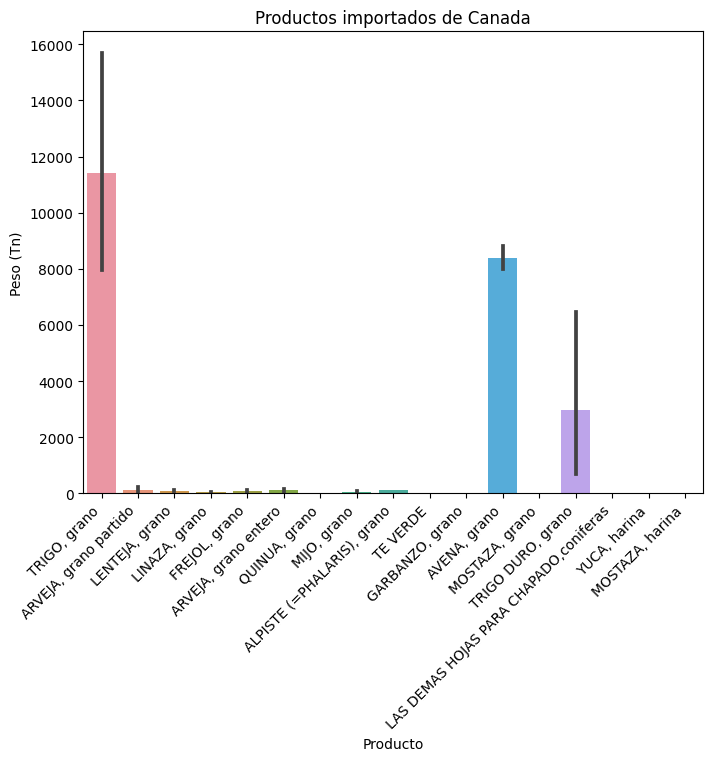

In [19]:
#PRODUCTOS IMPORTADOS DE CANADA
canada_data = import_data[import_data["Pais.Origen"] == "CANADA"]

plt.figure(figsize=(8,6))
plt.title("Productos importados de Canada")

sns.barplot(x=canada_data['Producto'], y=canada_data['Peso.Ton.'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Peso (Tn)")
canada_data

,Mes,Sede,Producto,Peso.Ton.,Tipo.de.Envase,Pais.Origen
5814,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"SOYA, torta",4207.8,GRANEL,PARAGUAY EN TRANSITO POR ARGENTINA
8297,Octubre,OFICINA PUESTO DE CONTROL MARITIMO - PROV. CON...,"SOYA, torta",6235.0,GRANEL,PARAGUAY EN TRANSITO POR ARGENTINA


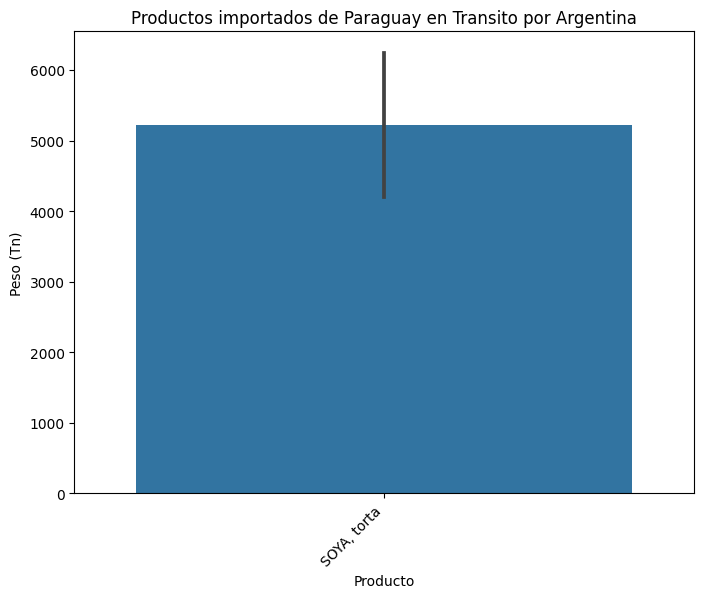

In [20]:
#PRODUCTOS IMPORTADOS DE PARAGUAY POR TRANSITO DE ARGENTINA
paraguay_arg_data = import_data[import_data["Pais.Origen"] == "PARAGUAY EN TRANSITO POR ARGENTINA"]

plt.figure(figsize=(8,6))
plt.title("Productos importados de Paraguay en Transito por Argentina")

sns.barplot(x=paraguay_arg_data['Producto'], y=paraguay_arg_data['Peso.Ton.'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Peso (Tn)")
paraguay_arg_data

# Analisis de los productos de Soya

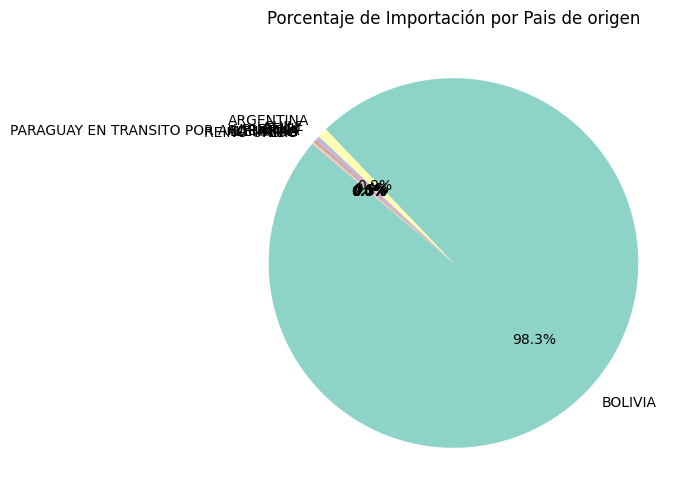

In [21]:
# Filtrar datos de productos de soya importados
soya_data = import_data[import_data["Producto"].isin(["SOYA, grano", "SOYA, harina", "SOYA, torta"])]
soya_data

# Porcentaje de importación por tipo de envase
Pais_counts = soya_data["Pais.Origen"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(Pais_counts, labels=Pais_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set3"))
plt.title("Porcentaje de Importación por Pais de origen")
plt.show()


Text(0.5, 1.0, 'Distribucion de los pesos totales segun los productos de Soya')

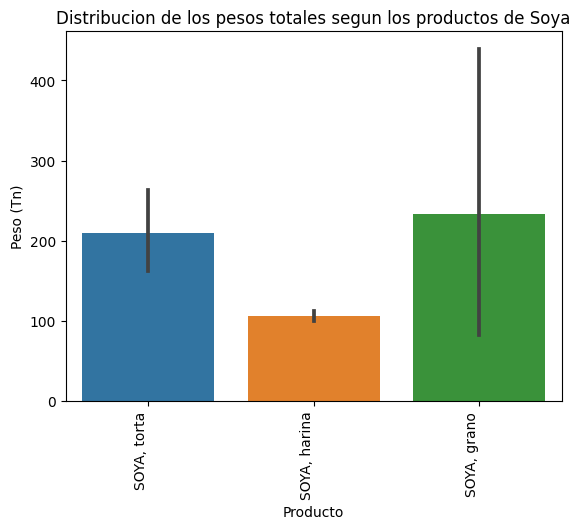

In [22]:
sns.barplot(x=soya_data['Producto'], y=soya_data['Peso.Ton.'])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Peso (Tn)")
plt.title("Distribucion de los pesos totales segun los productos de Soya")

Text(0.5, 1.0, 'Paises de donde se importo la Soya')

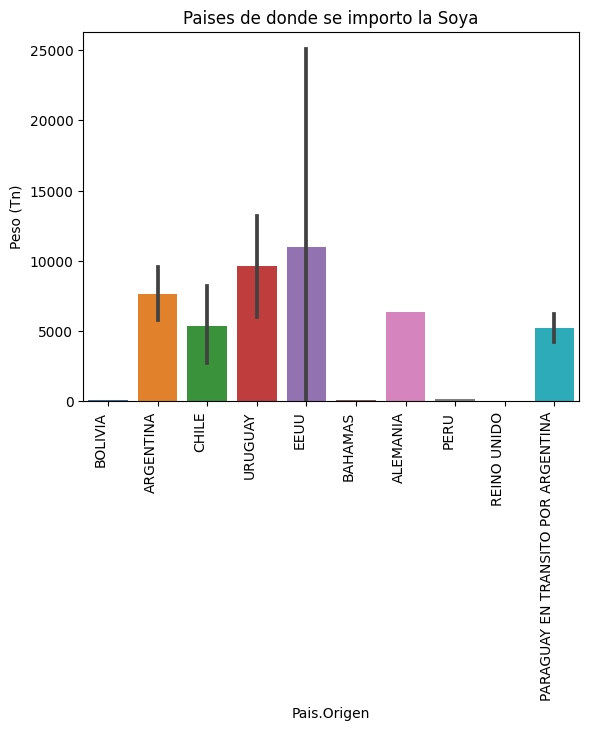

In [23]:
sns.barplot(x=soya_data['Pais.Origen'], y=soya_data['Peso.Ton.'])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Peso (Tn)")
plt.title("Paises de donde se importo la Soya")

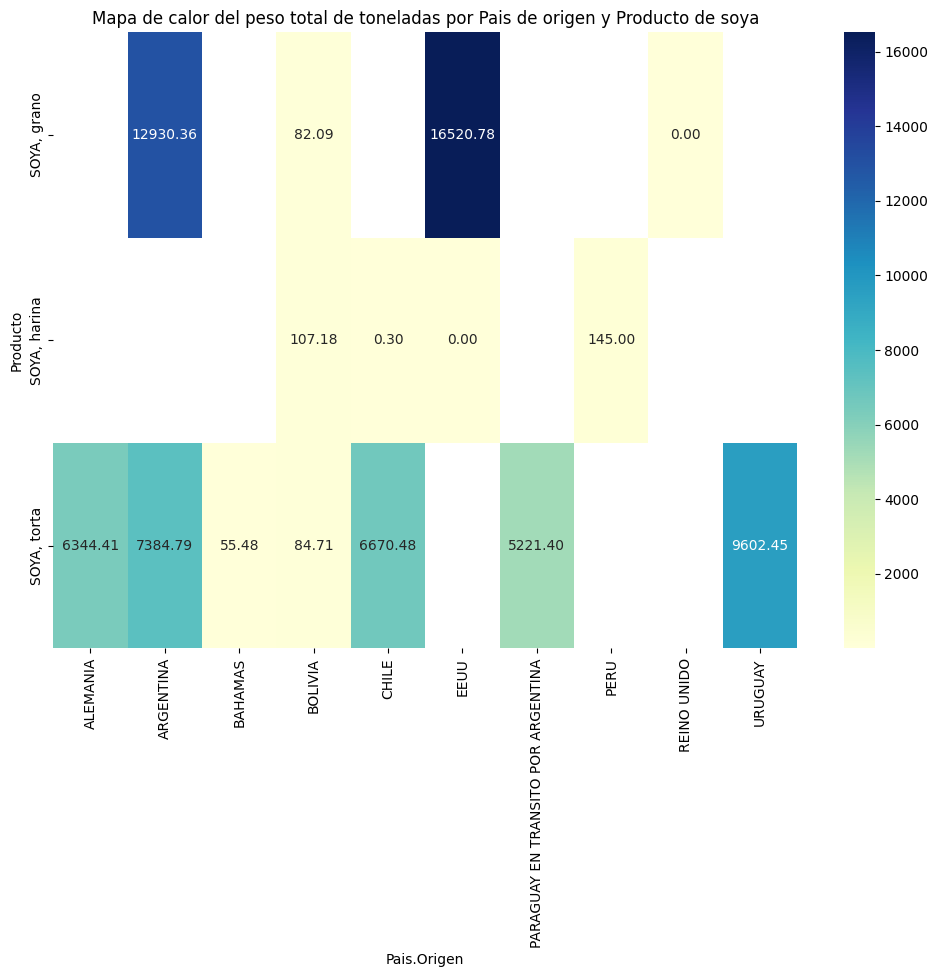

In [24]:
# Creando una tabla pivot
heatmap_data = soya_data.pivot_table(index='Producto', columns='Pais.Origen', values='Peso.Ton.', aggfunc='mean')

# Crear el heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Mapa de calor del peso total de toneladas por Pais de origen y Producto de soya')
plt.show()

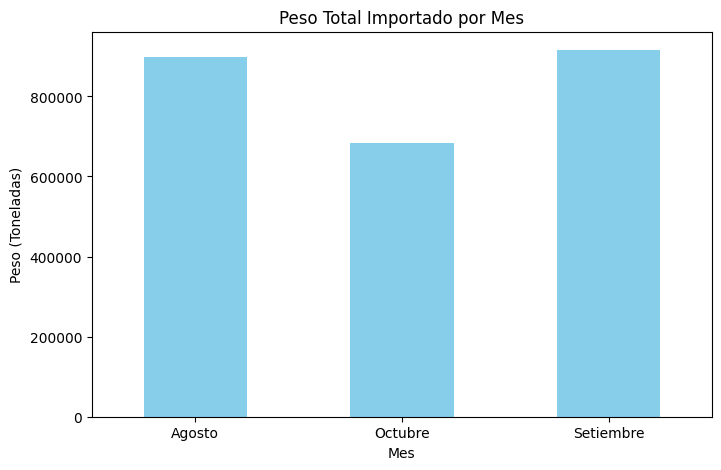

In [25]:
monthly_imports = import_data.groupby('Mes')['Peso.Ton.'].sum()
monthly_imports.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Peso Total Importado por Mes")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.xticks(rotation=0)
plt.show()


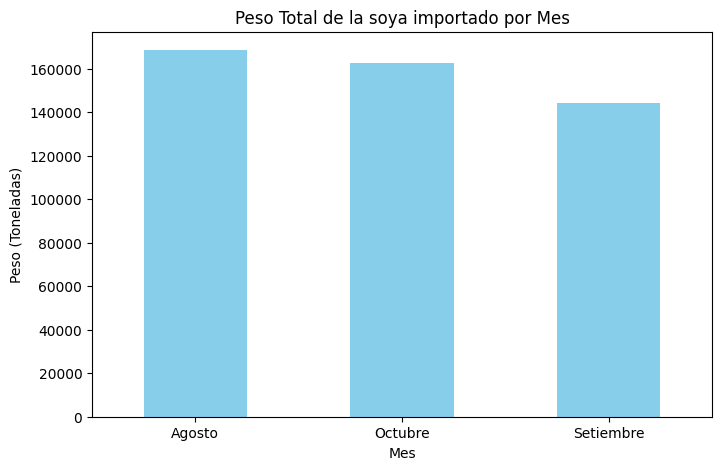

In [26]:
monthly_imports = soya_data.groupby('Mes')['Peso.Ton.'].sum()
monthly_imports.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Peso Total de la soya importado por Mes")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.xticks(rotation=0)
plt.show()


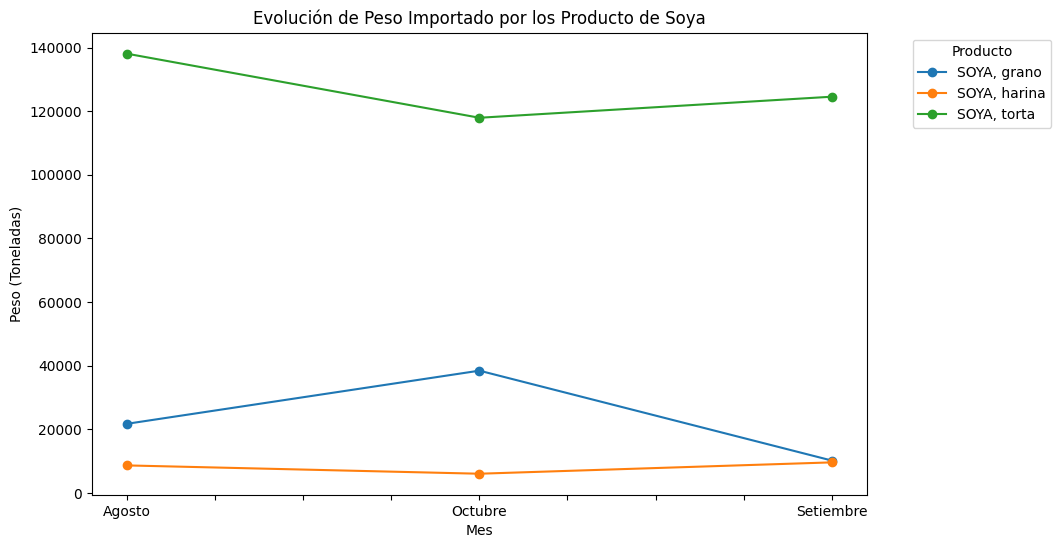

In [27]:
product_monthly = soya_data.groupby(['Mes', 'Producto'])['Peso.Ton.'].sum().unstack()
product_monthly.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Evolución de Peso Importado por los Producto de Soya")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


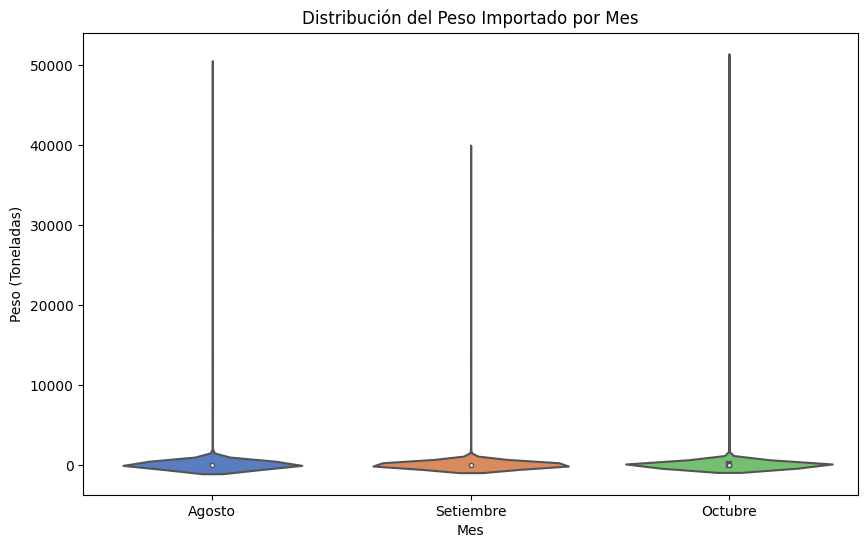

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Mes', y='Peso.Ton.', data=import_data, palette='muted')
plt.title("Distribución del Peso Importado por Mes")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.show()


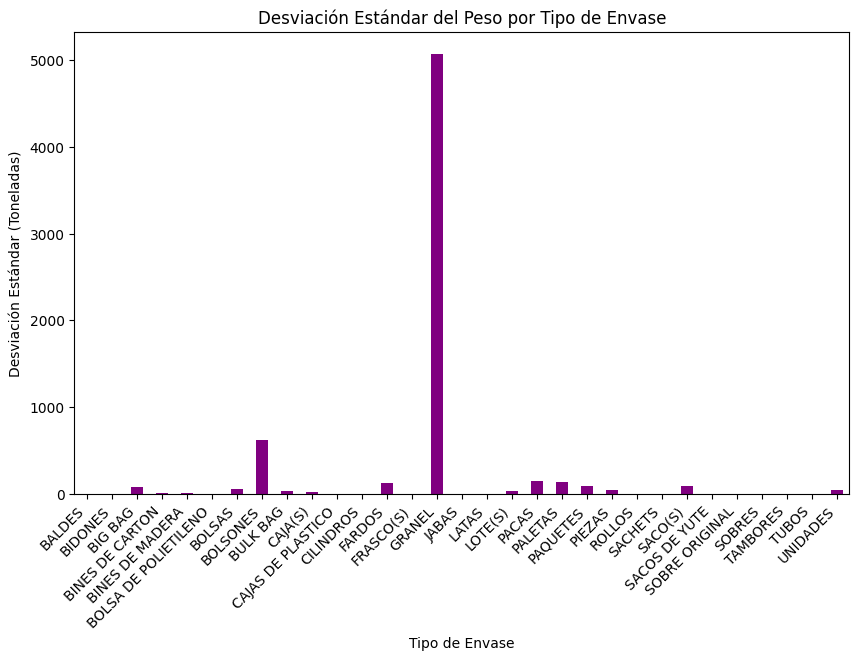

In [29]:
std_weight_by_package = import_data.groupby('Tipo.de.Envase')['Peso.Ton.'].std()
std_weight_by_package.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Desviación Estándar del Peso por Tipo de Envase")
plt.xlabel("Tipo de Envase")
plt.ylabel("Desviación Estándar (Toneladas)")
plt.xticks(rotation=45, ha='right')
plt.show()


# Analisis de los productos de Trigo

Text(0.5, 1.0, 'Productos de Trigo Importados')

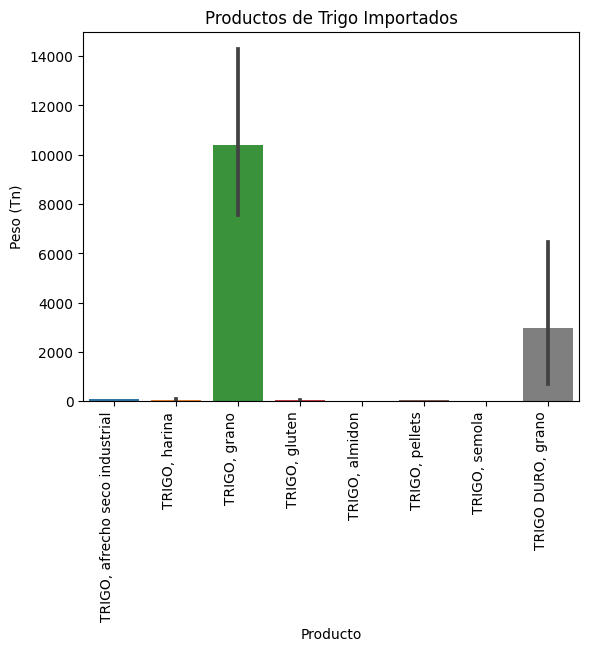

In [30]:
#Filtrado de datos
trigo_data = import_data[import_data["Producto"].str.contains("TRIGO", case=False, na=False)]

#Filtrando datos 
trigo_data = trigo_data[~trigo_data['Producto'].str.contains(
    'SALVADOS, moyuelos y demas residuos del cernido, de la molienda o de otros tratamientos del trigo', 
    case=False, 
    na=False
)]


#Grafico de barras
sns.barplot(x=trigo_data['Producto'], y=trigo_data['Peso.Ton.'])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Peso (Tn)")
plt.title("Productos de Trigo Importados")

Text(0.5, 1.0, 'Paises de donde se importo el trigo')

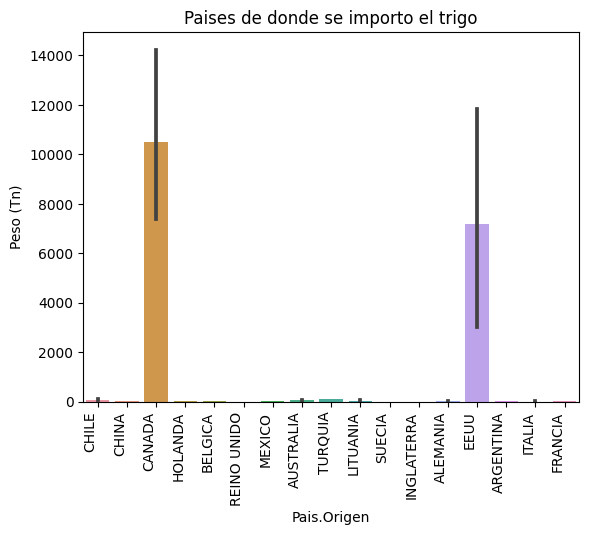

In [31]:
sns.barplot(x=trigo_data['Pais.Origen'], y=trigo_data['Peso.Ton.'])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Peso (Tn)")
plt.title("Paises de donde se importo el trigo")

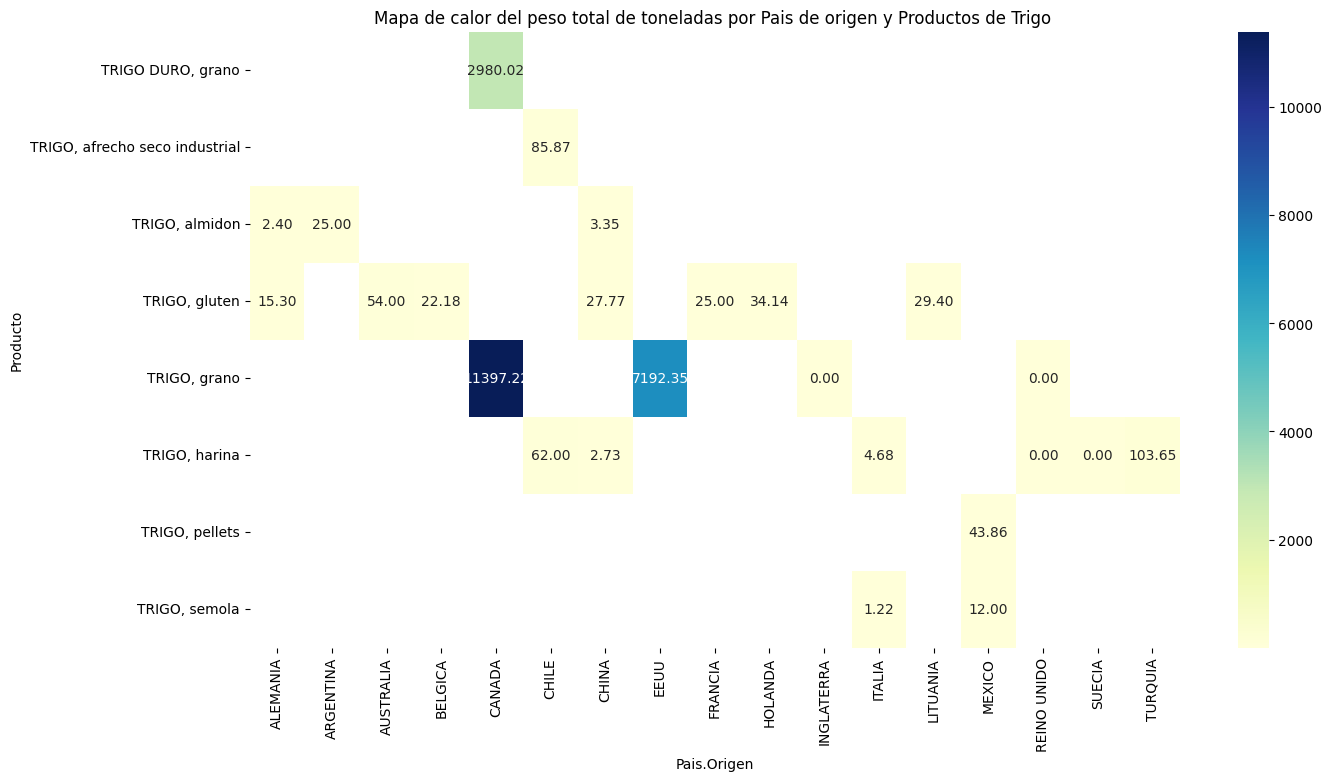

In [32]:
# Creando una tabla pivot
heatmap_data = trigo_data.pivot_table(index='Producto', columns='Pais.Origen', values='Peso.Ton.', aggfunc='mean')


# Crear el heatmap
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Mapa de calor del peso total de toneladas por Pais de origen y Productos de Trigo ')
plt.show()

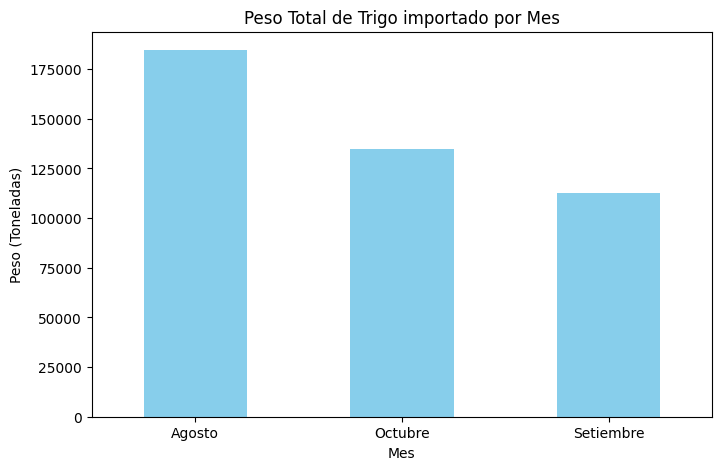

In [33]:
monthly_imports = trigo_data.groupby('Mes')['Peso.Ton.'].sum()
monthly_imports.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Peso Total de Trigo importado por Mes")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.xticks(rotation=0)
plt.show()

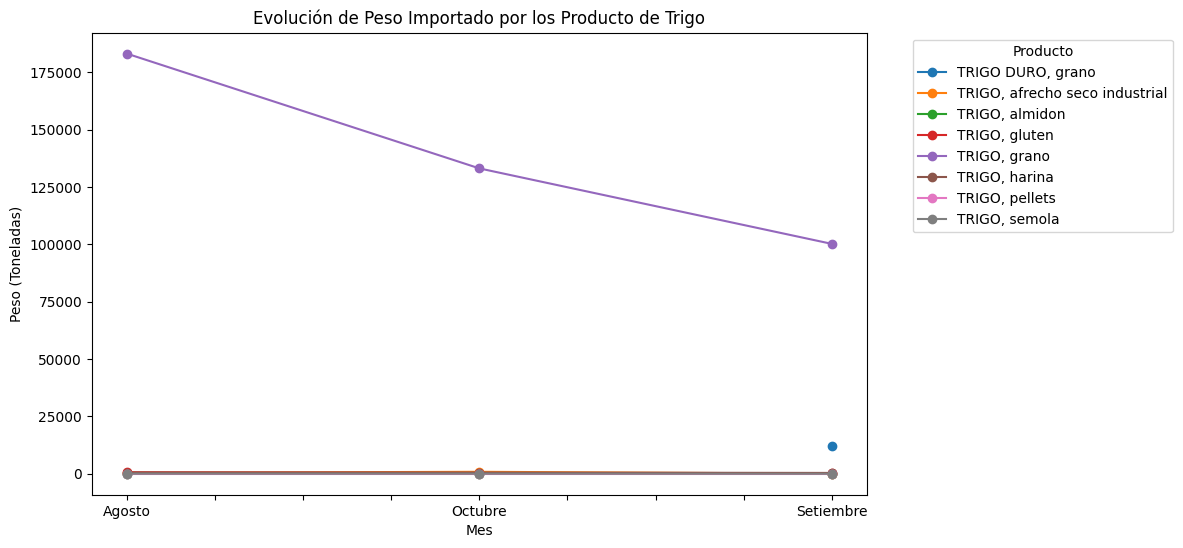

In [34]:
product_monthly = trigo_data.groupby(['Mes', 'Producto'])['Peso.Ton.'].sum().unstack()
product_monthly.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Evolución de Peso Importado por los Producto de Trigo")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Analisis de los productos de Maiz

Text(0.5, 1.0, 'Productos de Maiz Importados')

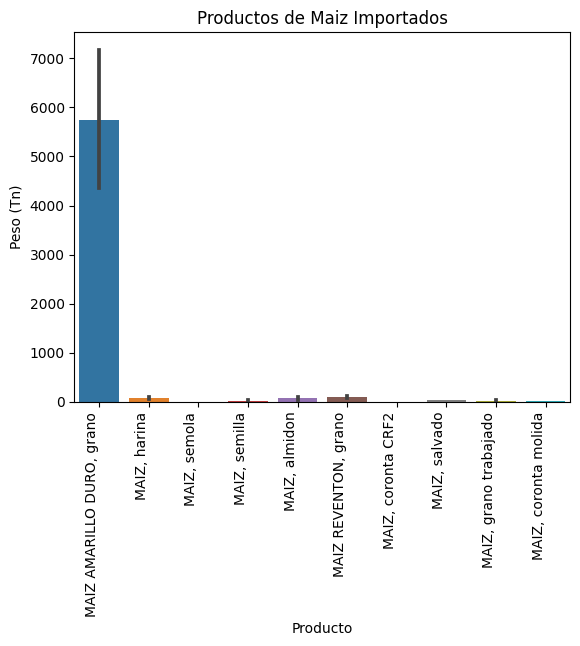

In [35]:
#Filtrado de datos
maiz_data = import_data[import_data["Producto"].str.contains("MAIZ", case=False, na=False)]
maiz_data.loc[:, 'Producto'] = maiz_data['Producto'].str.replace(
    'MAIZ, grano trabajado \(mondado, perlado, troceado o quebrantado\)', 
    'MAIZ, grano trabajado', 
    regex=True
)
maiz_data.loc[:, 'Producto'] = maiz_data['Producto'].str.replace(
    'MAIZ, coronta con algún proceso de la CRF 2', 
    'MAIZ, coronta CRF2', 
    regex=False
)
#Eliminando 
maiz_data = maiz_data[~maiz_data['Producto'].str.contains(
    'HARINA, mezcla de harina de yuca, platano, arroz, cebada, maiz', 
    case=False, 
    na=False
)]
#Grafico de barras
sns.barplot(x=maiz_data['Producto'], y=maiz_data['Peso.Ton.'])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Peso (Tn)")
plt.title("Productos de Maiz Importados")

Text(0.5, 1.0, 'Paises de donde se importo el maiz')

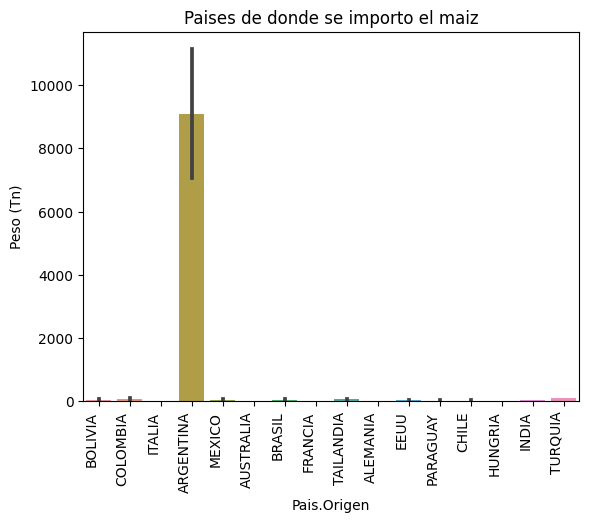

In [36]:
sns.barplot(x=maiz_data['Pais.Origen'], y=maiz_data['Peso.Ton.'])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Peso (Tn)")
plt.title("Paises de donde se importo el maiz")

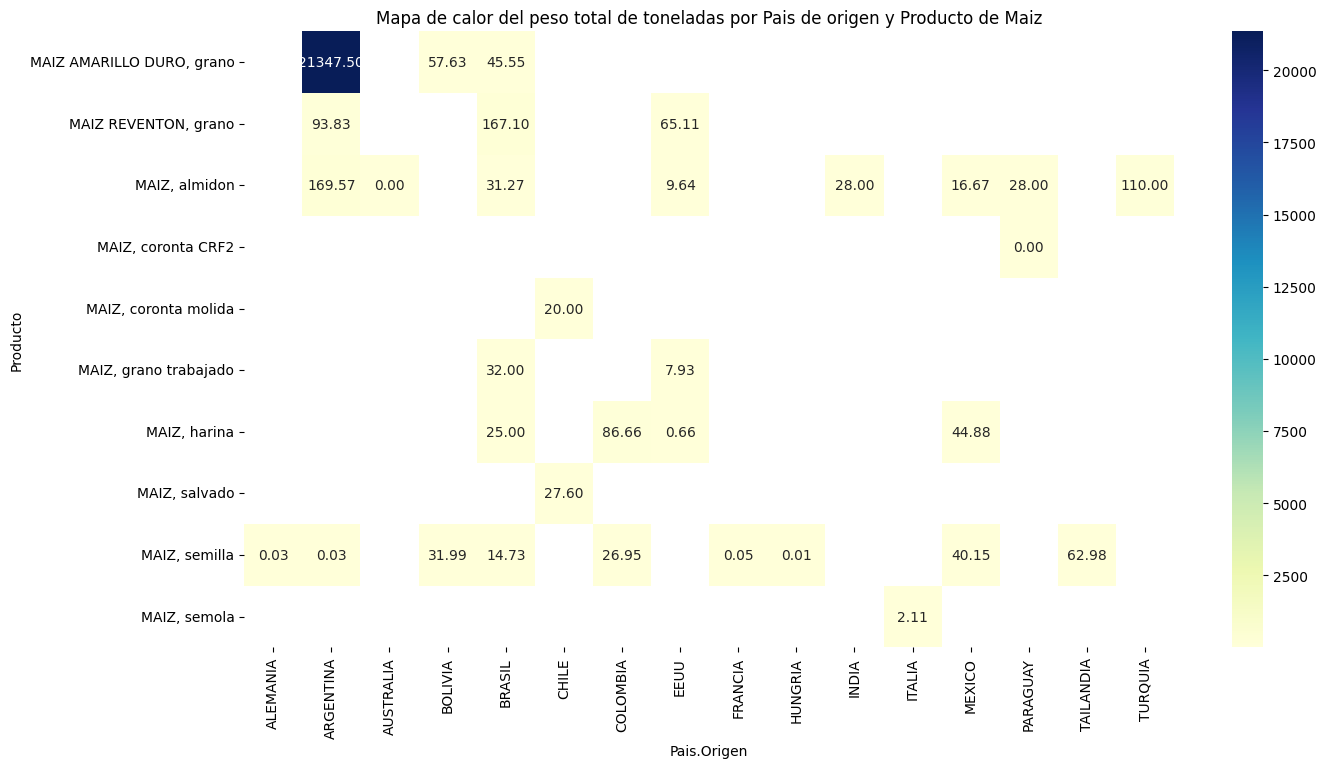

In [37]:
# Creando una tabla pivot
heatmap_data = maiz_data.pivot_table(index='Producto', columns='Pais.Origen', values='Peso.Ton.', aggfunc='mean')


# Crear el heatmap
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Mapa de calor del peso total de toneladas por Pais de origen y Producto de Maiz')
plt.show()

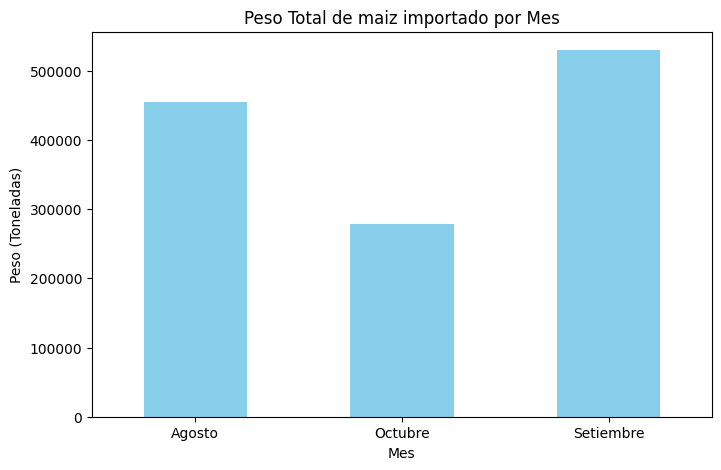

In [38]:
monthly_imports = maiz_data.groupby('Mes')['Peso.Ton.'].sum()
monthly_imports.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Peso Total de maiz importado por Mes")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.xticks(rotation=0)
plt.show()

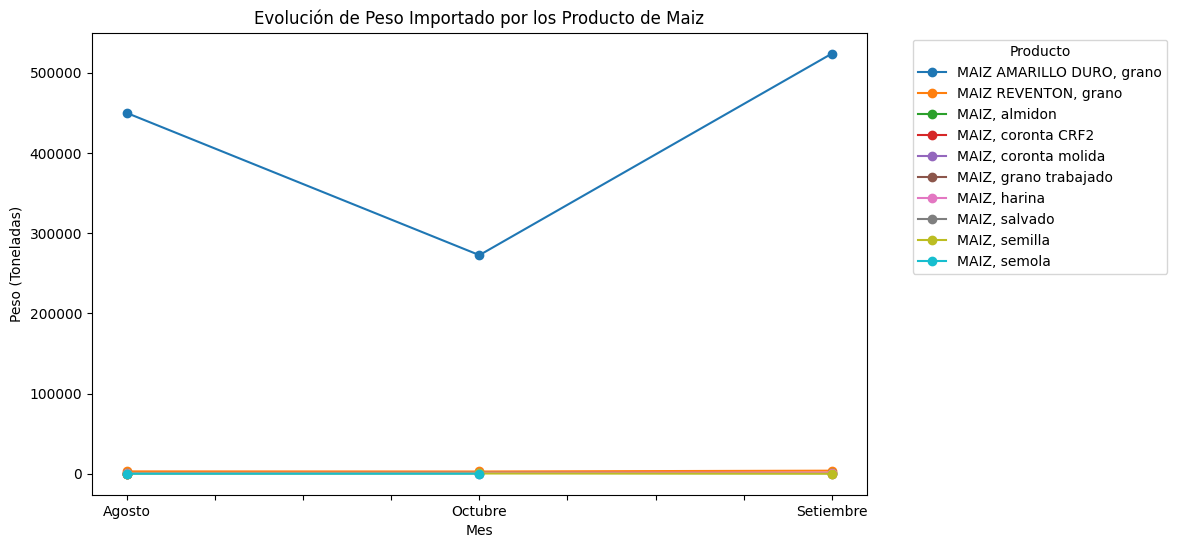

In [39]:
product_monthly = maiz_data.groupby(['Mes', 'Producto'])['Peso.Ton.'].sum().unstack()
product_monthly.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Evolución de Peso Importado por los Producto de Maiz")
plt.xlabel("Mes")
plt.ylabel("Peso (Toneladas)")
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()